<a href="https://colab.research.google.com/github/SebastianGomezViggiano/Computer-Vision/blob/main/M1_Image%20Processing/Exercise%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk




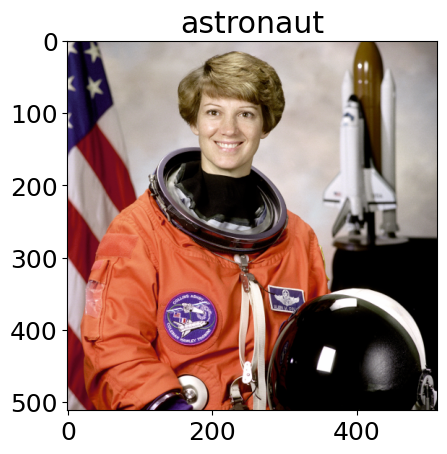

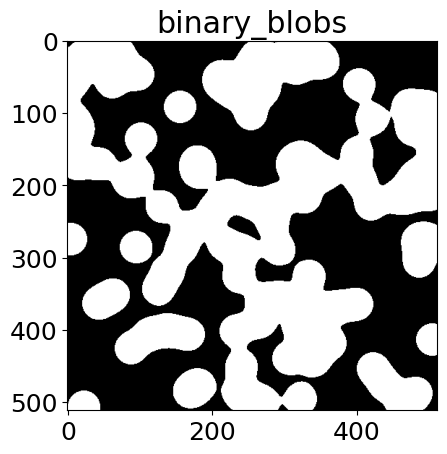

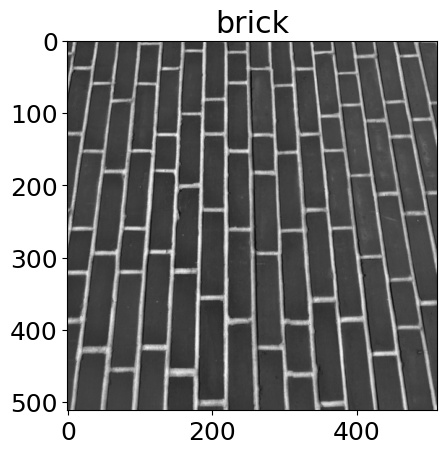

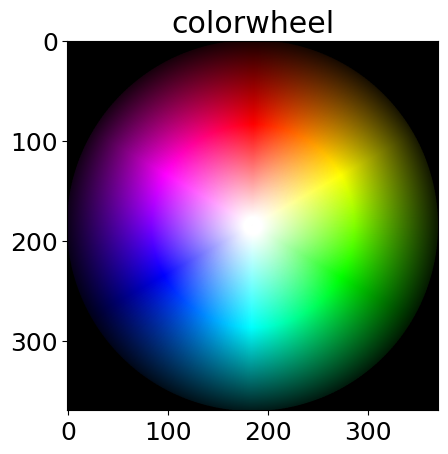

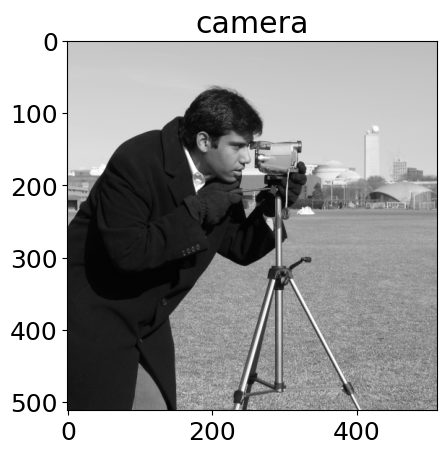

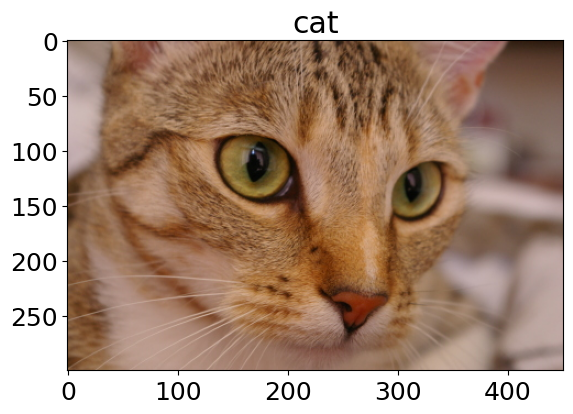

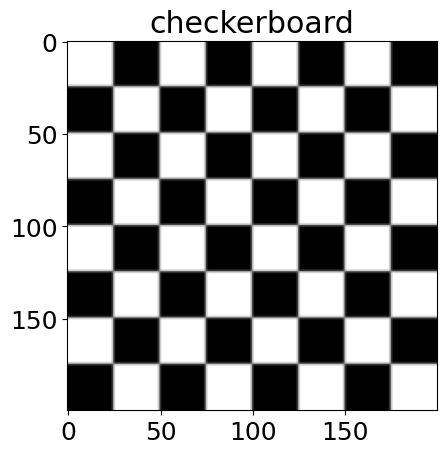

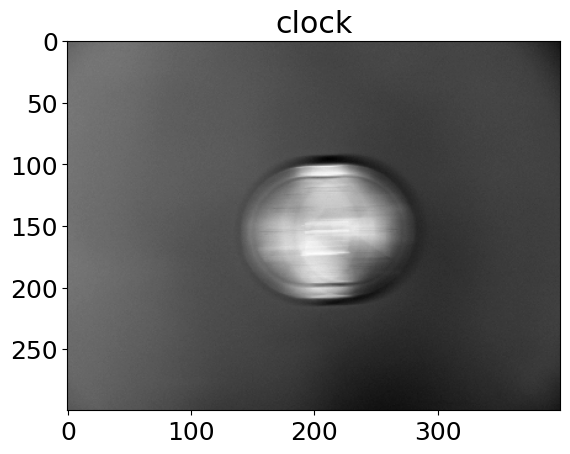

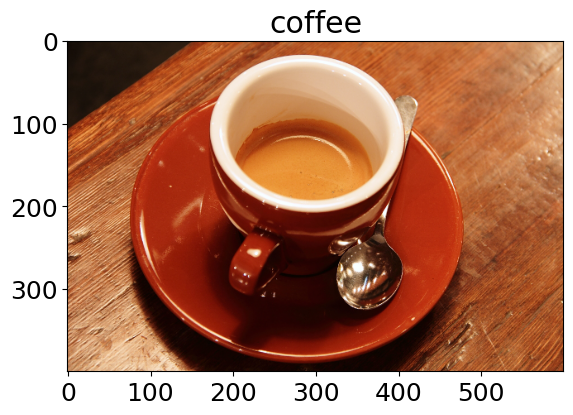

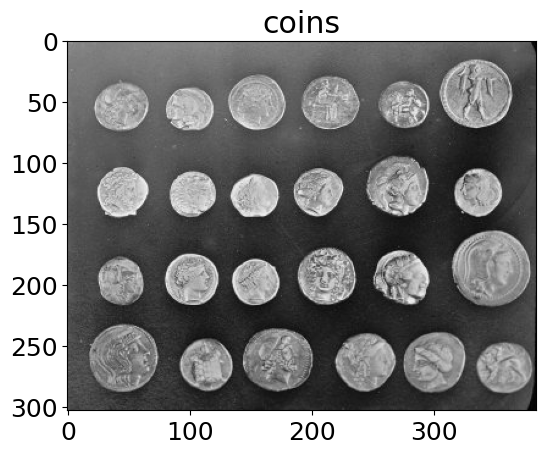

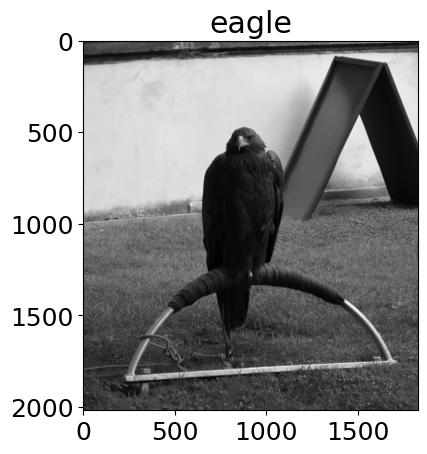

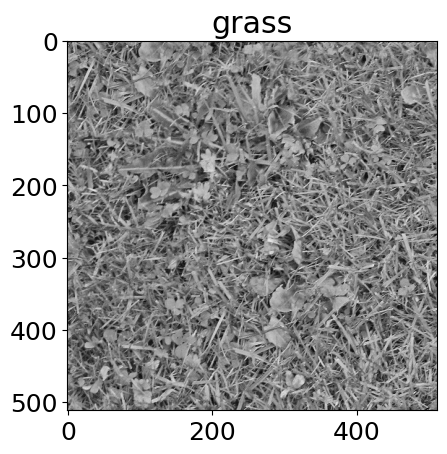

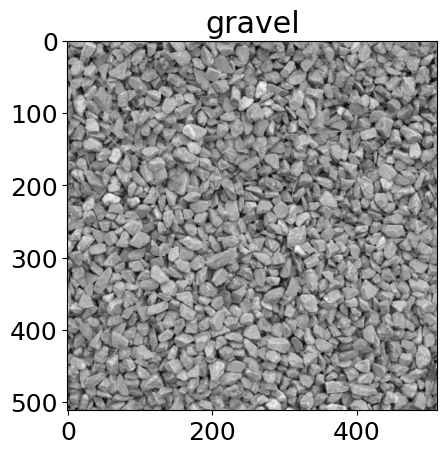

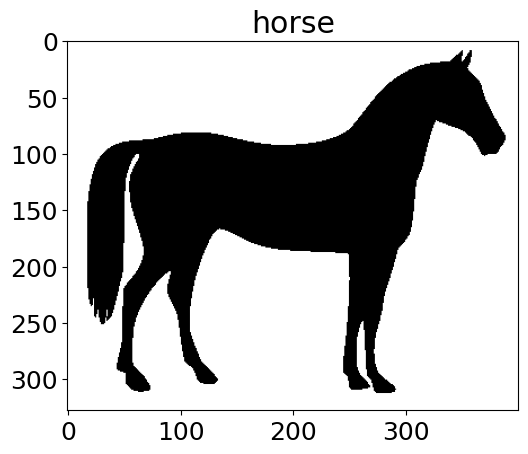

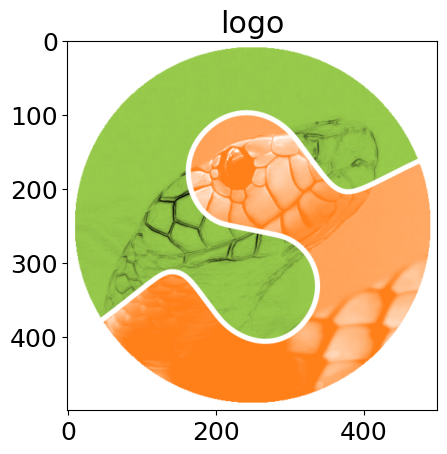

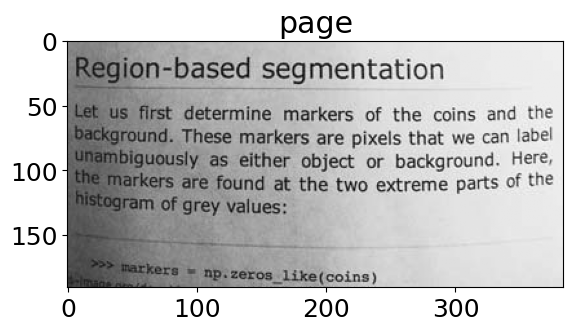

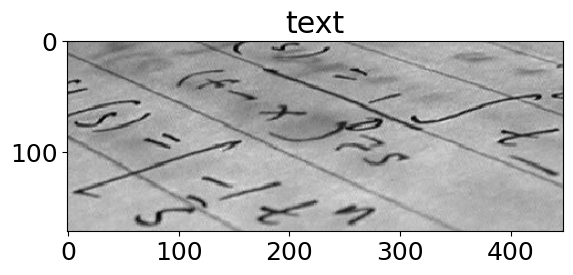

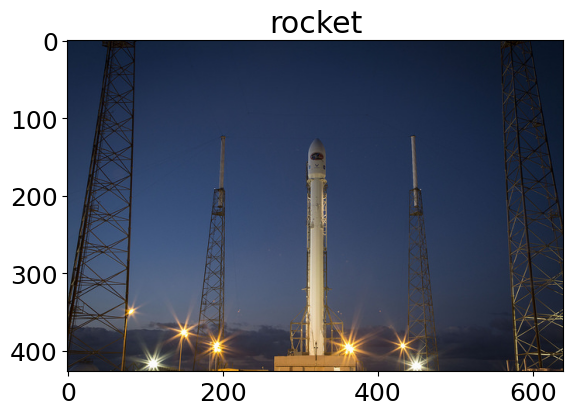

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 18

images = (
    'astronaut',
    'binary_blobs',
    'brick',
    'colorwheel',
    'camera',
    'cat',
    'checkerboard',
    'clock',
    'coffee',
    'coins',
    'eagle',
    'grass',
    'gravel',
    'horse',
    'logo',
    'page',
    'text',
    'rocket',
)


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

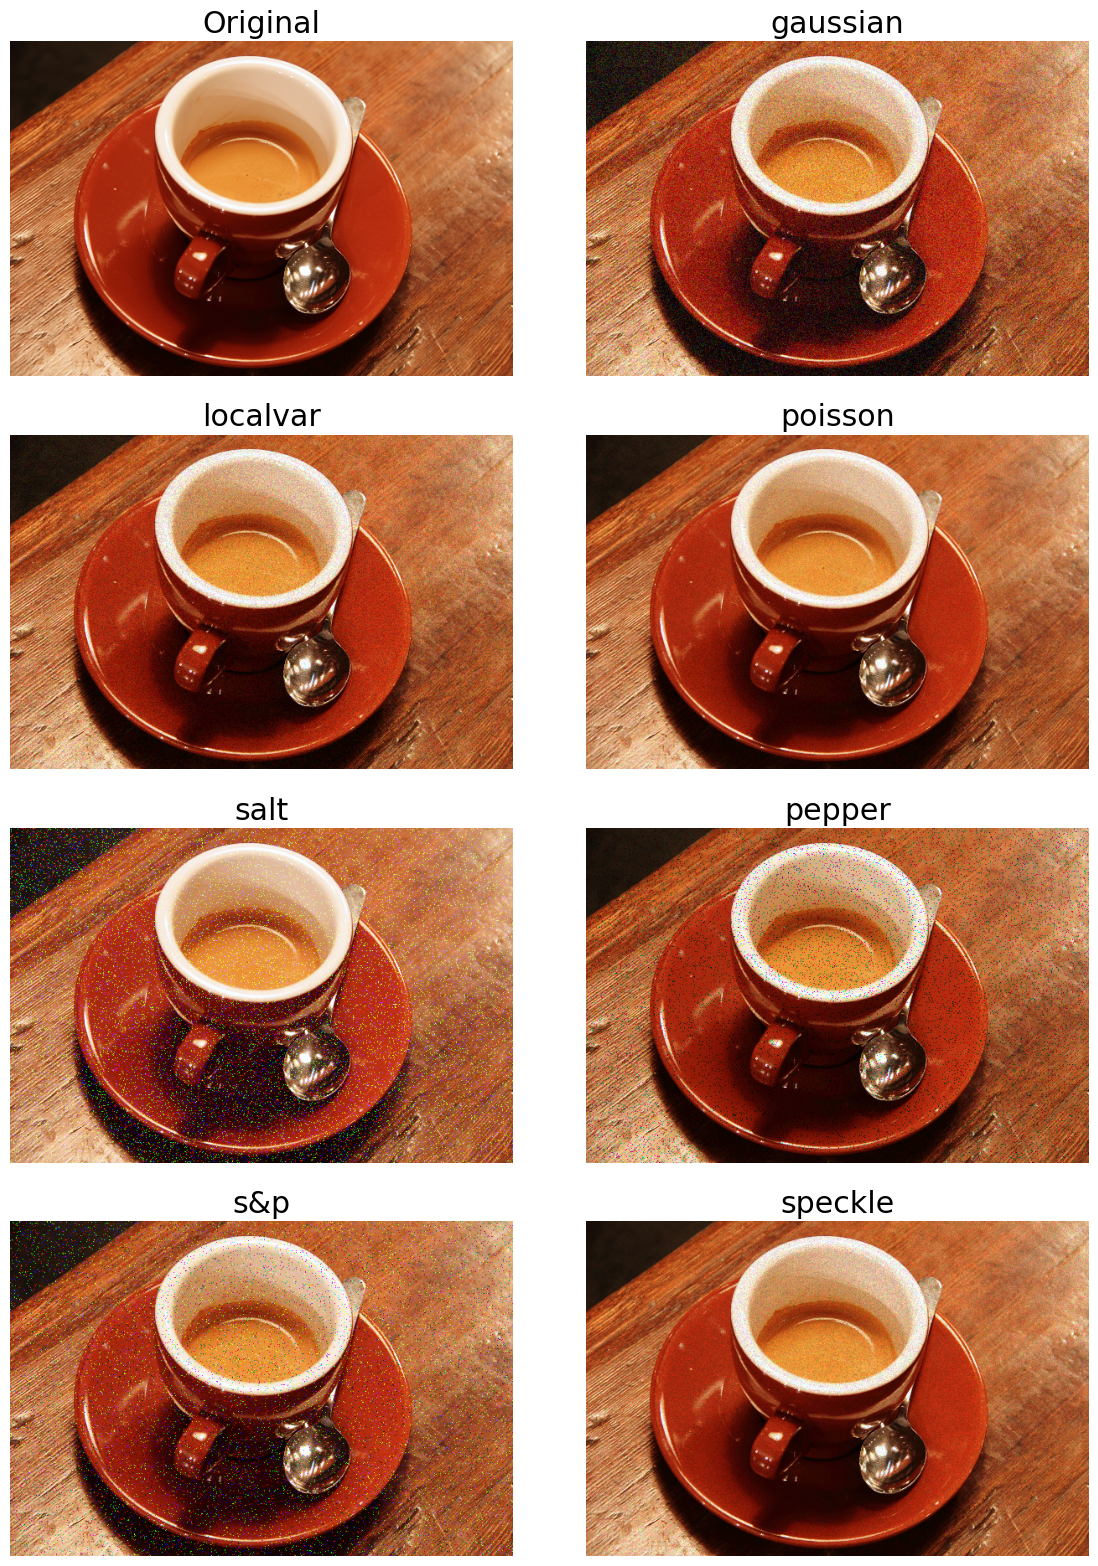

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float
from skimage.util import random_noise

# Load coffee image and convert to float [0,1]
original = img_as_float(data.coffee())

# The seven noise modes
noise_modes = [
    'gaussian', 'localvar', 'poisson',
    'salt', 'pepper', 's&p', 'speckle'
]

# Create 4×2 figure
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.ravel()

# Plot original
axes[0].imshow(original)
axes[0].set_title('Original')
axes[0].axis('off')

# Generate and plot each noisy version
for ax, mode in zip(axes[1:], noise_modes):
    if mode == 'localvar':
        # Ensure all values > 0
        local_vars = 0.01 * original + 1e-4  # offset to avoid 0
        noisy = random_noise(original, mode=mode, local_vars=local_vars)
    else:
        noisy = random_noise(original, mode=mode)
    ax.imshow(noisy)
    ax.set_title(mode)
    ax.axis('off')

plt.tight_layout()
plt.savefig('coffee_all_noises.png', dpi=150)
plt.show()
